# 목차

- Grid Search 알아보기
- Grid Search 직접 해보기

  - 사용 데이터 셋: Iris
  - EDA
  - 직접 탐색 모델 구현하기
  - 라이브러리 사용하여 구현하기 (GridSearchCV)

---

# Grid Search 알아보기

## Grid Search

- Cross-validation을 기반으로 주어진 하이퍼파라미터의 모든 조합 중 최적의 값(Loss function 최소화)을 찾아주는 탐색 방법
- 하이퍼파라미터 조합을 순차적으로 적용. 모든 하이퍼파라미터 조합을 검증할 수 있지만, 수행시간이 상대적으로 오래 걸리는 단점이 있음

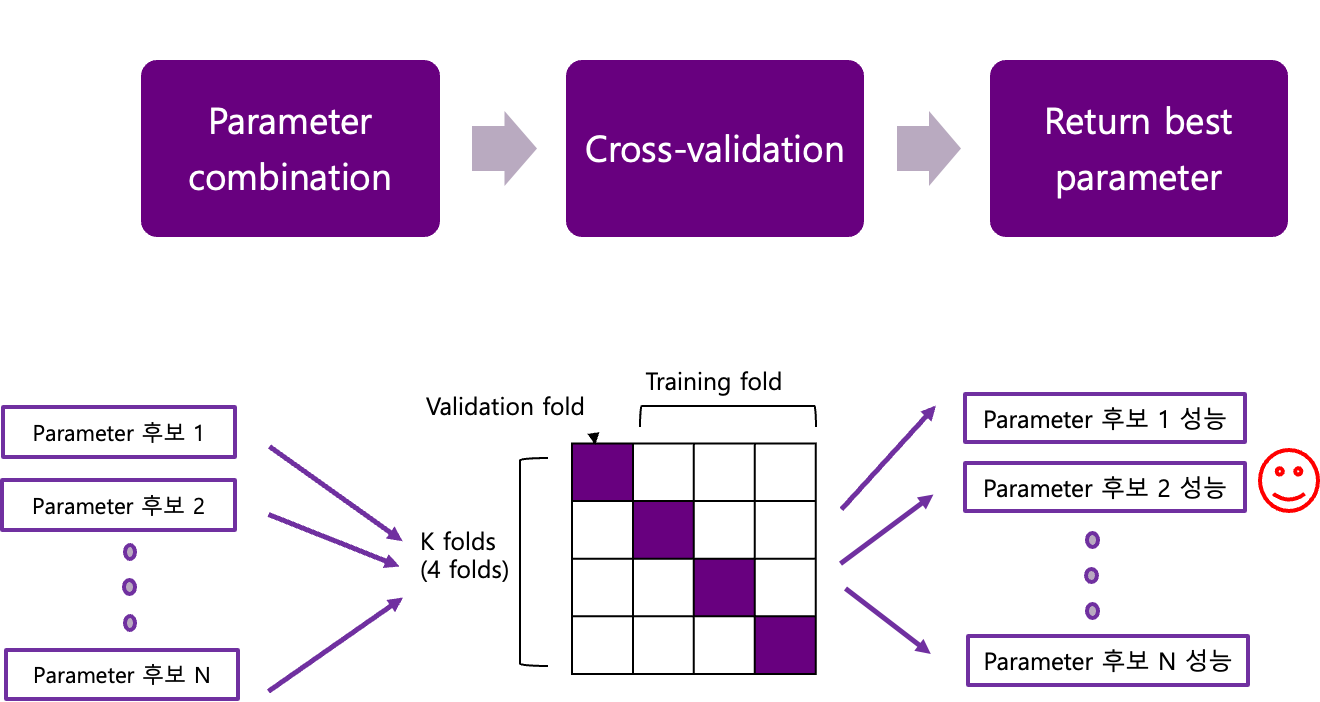

---

# Random Search 직접 해보기

- 활용 데이터: Iris

> 'Iris'는 데이터 분석을 해보신 분들이라면 대부분 접해보셨을 데이터 셋입니다. Iris는 붓꽃 데이터 셋으로, 각 데이터는 붓꽃의 측정된 상태(특성)과 함께 여러 종류의 붓꽃이 분류된 데이터 셋 입니다. 

- 방법론: [Random Forest](https://ko.wikipedia.org/wiki/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8)

## 0. 필요한 라이브러리 로드

In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

## 1. 데이터 로드 및 EDA

### Iris Data

- 총 150개의 데이터
- 4가지의 변수를 활용해 3개의 label로 분류하기

In [3]:
iris = load_iris()

data = iris.data
target = iris.target

In [9]:
data[0], target[0]

# setosa / versicolor / virginica

(array([5.1, 3.5, 1.4, 0.2]), 0)

로드한 데이터를 토대로, 모델 학습 및 검증에 활용할 수 있게 train/test 데이터 셋으로 분리하였습니다.

In [11]:
# seed
# computer -> seed (씨앗)
    # computer 4bit, 8bit
    # 시작 메모리가 정해져 -> seed 정해두면

# 4씩 커지는 무엇이 -> 이러면, 문제가 될 경우가있으니까, 이걸 통제하겠다
# 1 5 9 13,,, Seed 1 -> 80%
# 2 6 10 14,,, Seed 2 -> 68%

Object `seed` not found.


In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=999)

데이터 현황을 간단히 확인하기 위해 데이터 셋을 정리하였습니다.

In [13]:
a = pd.DataFrame(data, columns=iris.feature_names)
b = pd.DataFrame(iris.target_names[target], columns=['target'])
df = pd.concat([a, b], axis=1)

In [14]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
df.target.value_counts()

target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## 2. 모델 로드

- 검증 대상이 되는 모델인 'Random forest'는 여러 개의 Decision Tree를 합쳐 분류 또는 회귀를 하는 모형입니다.
- (python) [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

#### 하이퍼파라미터
> 'RandomForestClassifier'는 아주 많은 하이퍼파라미터를 갖고 있습니다. 본 실험에서 HPO 대상이되는 파라미터는 다음과 같습니다.

- n_estimator : decision tree의 개수, default=10
- max_depth : tree의 깊이
- min_samples_leaf : leaf 노드가 되기 위한 최소한의 샘플 데이터 수
- min_samples_split : 노드를 분할하기 위한 최소한의 데이터 수

In [17]:
model = RandomForestClassifier()

random forest에서 사용 가능한 하이퍼파라미터를 확인하면 다음과 같습니다.

In [26]:
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [27]:
parameters = {'n_estimators':[5,10,20],
              'max_depth':[1,2,3],
              'min_samples_leaf':[2,3,5],
              'min_samples_split':[2,3,5]}

In [57]:
parameters = {
    'n_estimators': range(1, 100),
    'max_depth': range(1, 50),
    'min_samples_leaf': [2,3,5],
    'min_samples_split': [2,3,5],
    }

In [56]:
hp_comb = list(product(*parameters.values()))
print(len(hp_comb))

392931


In [58]:
hp_comb = list(product(*parameters.values()))
print(len(hp_comb))

43659


## 3-1. 라이브러리 없이 grid search 구현

알고리즘을 이해하는데는 직접 구현해보는 것만한 것이 없죠? 많이 알려진 방법이라 다양한 라이브러리가 있는데요, 그 라이브러리를 활용하기에 앞서 직접 탐색 방법을 구현해보도록 하겠습니다.

먼저 사용한 방법의 흐름을 간단히 요약하면 다음과 같습니다.

- Stratified K-fold. Train 데이터에서의 label(정답) 분포가 Test 데이터에서의 label(정답) 분포와 유사하도록 맞춰주는 교차검증 방법. cross validation 과정에서 데이터의 고른 분포를 위해 stratifiedFold 사용

In [28]:
from itertools import product

In [29]:
parameters

{'n_estimators': [5, 10, 20],
 'max_depth': [1, 2, 3],
 'min_samples_leaf': [2, 3, 5],
 'min_samples_split': [2, 3, 5]}

먼저, 하이퍼파라미터의 조합을 생성하도록 하겠습니다.

In [30]:
hp_comb = list(product(*parameters.values()))
print(len(hp_comb))

81


생성된 조합을 확인하면 아래와 같습니다.

In [31]:
hp_comb

[(5, 1, 2, 2),
 (5, 1, 2, 3),
 (5, 1, 2, 5),
 (5, 1, 3, 2),
 (5, 1, 3, 3),
 (5, 1, 3, 5),
 (5, 1, 5, 2),
 (5, 1, 5, 3),
 (5, 1, 5, 5),
 (5, 2, 2, 2),
 (5, 2, 2, 3),
 (5, 2, 2, 5),
 (5, 2, 3, 2),
 (5, 2, 3, 3),
 (5, 2, 3, 5),
 (5, 2, 5, 2),
 (5, 2, 5, 3),
 (5, 2, 5, 5),
 (5, 3, 2, 2),
 (5, 3, 2, 3),
 (5, 3, 2, 5),
 (5, 3, 3, 2),
 (5, 3, 3, 3),
 (5, 3, 3, 5),
 (5, 3, 5, 2),
 (5, 3, 5, 3),
 (5, 3, 5, 5),
 (10, 1, 2, 2),
 (10, 1, 2, 3),
 (10, 1, 2, 5),
 (10, 1, 3, 2),
 (10, 1, 3, 3),
 (10, 1, 3, 5),
 (10, 1, 5, 2),
 (10, 1, 5, 3),
 (10, 1, 5, 5),
 (10, 2, 2, 2),
 (10, 2, 2, 3),
 (10, 2, 2, 5),
 (10, 2, 3, 2),
 (10, 2, 3, 3),
 (10, 2, 3, 5),
 (10, 2, 5, 2),
 (10, 2, 5, 3),
 (10, 2, 5, 5),
 (10, 3, 2, 2),
 (10, 3, 2, 3),
 (10, 3, 2, 5),
 (10, 3, 3, 2),
 (10, 3, 3, 3),
 (10, 3, 3, 5),
 (10, 3, 5, 2),
 (10, 3, 5, 3),
 (10, 3, 5, 5),
 (20, 1, 2, 2),
 (20, 1, 2, 3),
 (20, 1, 2, 5),
 (20, 1, 3, 2),
 (20, 1, 3, 3),
 (20, 1, 3, 5),
 (20, 1, 5, 2),
 (20, 1, 5, 3),
 (20, 1, 5, 5),
 (20, 2, 2, 2),
 (2

cross validation는 신뢰도 높은 탐색 결과를 얻을 수 있게 합니다. 이에 따라, 탐색을 수행하는 다음 코드에 cross validation을 더하였습니다.

In [32]:
# cross validation
import numpy as np
import tqdm
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
cv_r = pd.DataFrame()
fold_idx = 0

for i in tqdm.tqdm(range(0, len(hp_comb))):
    params = {'n_estimators':hp_comb[i][0],
                 'max_depth':hp_comb[i][1],
                 'min_samples_leaf':hp_comb[i][2],
                 'min_samples_split':hp_comb[i][3]}
    model = RandomForestClassifier(n_estimators=hp_comb[i][0],
                                  max_depth=hp_comb[i][1],
                                  min_samples_leaf=hp_comb[i][2],
                                  min_samples_split=hp_comb[i][3])
    all_acc = []
    for train_idx, test_idx in skf.split(data, target):
        train_x, train_y = data[train_idx], target[train_idx]
        test_x, test_y = data[test_idx], target[test_idx]
        
        model.fit(train_x, train_y)
        pred_y = model.predict(test_x)
        acc = accuracy_score(test_y, pred_y)
        all_acc.append(acc)
        fold_idx += 1
    r = pd.DataFrame({'params':[params], 'acc':[np.mean(acc)]})    
    cv_r = pd.concat([cv_r, r])

  0%|          | 0/81 [00:00<?, ?it/s]

100%|██████████| 81/81 [00:07<00:00, 10.26it/s]


검증 성능(acc)이 높은 순으로 배열하여 결과를 확인해보겠습니다.

In [44]:
cv_r.sort_values(by='acc',ascending=False).head()

,params,acc
0,"{'n_estimators': 5, 'max_depth': 1, 'min_sampl...",1.0
0,"{'n_estimators': 20, 'max_depth': 1, 'min_samp...",1.0
0,"{'n_estimators': 20, 'max_depth': 1, 'min_samp...",1.0
0,"{'n_estimators': 20, 'max_depth': 1, 'min_samp...",1.0
0,"{'n_estimators': 10, 'max_depth': 3, 'min_samp...",1.0


이번엔 가장 성능이 좋은 하이퍼파라미터 조합을 출력해보겠습니다.

In [45]:
cv_r[cv_r.acc==cv_r.acc.max()].iloc[0]['params']

{'n_estimators': 5,
 'max_depth': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

## 3-2. 라이브러리(GridSearchCV) 활용
### GridSearchCV
cross-validation을 기반으로 하이퍼파라미터들의 조합 중 최적 값을 찾아줍니다. 데이터셋을 cross-validation을 위해 train/test set으로 분할하고 파라미터 조합을 순차적으로 적용합니다. 모든 파라미터 조합을 테스트해 볼 수 있지만 수행시간이 상대적으로 오래걸리는 단점이 있습니다.

다음은 GridSearchCV의 파라미터입니다.

- estimator : 사용할 모델
- param_grid : 테스트 할 파라미터 집합, 딕셔너리 형태 ( key에 파라미터 이름, value에 값 )
- scroring : None이 default, 성능 평가를 어떤 기준으로 할 것인지? 사용하는 모델, 목표에 따라 다른 scoring method를 사용하면 됨. accuracy,roc_auc_score,average_precision 등을 사용할 수 있고 일반적으로 skitlearn에서 제공하는 accuracy를 사용하지만 별도의 함수도 직접 지정할 수 있다.
- n_jobs : 병렬 프로세스를 실행할 수 있도록, -1이면 using all processors 
- refit : True가 default, estimator를 best 하이퍼파라미터로 재학습 시킬것인지?
- cv : None이 default, cross validation(교차검증)을 위해 분할되는 fold 수
- verbose : 0가 default, 큰 수를 입력할수록 print되는 내용이 더 많아짐
- return_train_score : False면 cv_results_가 training score 값을 갖고 있지 않음

먼저 앞에 수행했던 것과 동일하게 데이터를 로드하고, 학습 및 테스트 셋으로 분리합니다.

In [46]:
iris = load_iris()

data = iris.data
target = iris.target

# train / test set split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=999)

다음으로 그리드 서치를 위해 GridSearchCV를 불러와 정의하고, 학습 데이터 셋으로 최적 하이퍼파라미터를 탐색합니다.

In [47]:
grid_rf = GridSearchCV(model, 
                        param_grid=parameters,
                        scoring='accuracy',
                        n_jobs=-1,
                        refit=True,
                        cv=5,
                        verbose=1,
                        return_train_score=True
                        )

grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=3, min_samples_leaf=5,
                                              min_samples_split=5,
                                              n_estimators=20),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [5, 10, 20]},
             return_train_score=True, scoring='accuracy', verbose=1)

하이퍼파라미터를 학습했으면 결과를 확인해야겠죠? 이번엔 탐색 결과를 불러와 확인해보는 코드입니다.
- 이 때, 'rank_test_score'가 성능의 순위를 의미합니다.

In [48]:
cv_r = pd.DataFrame(grid_rf.cv_results_)
cv_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020820,0.005311,0.004804,0.002137,1,2,2,5,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.714286,...,0.800000,0.097124,73,0.690476,0.964286,0.976190,0.892857,0.702381,0.845238,0.124858
1,0.038034,0.005104,0.003604,0.001201,1,2,2,10,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.952381,...,0.838095,0.182201,62,0.964286,0.952381,0.702381,0.702381,0.940476,0.852381,0.122706
2,0.073466,0.011734,0.007807,0.003766,1,2,2,20,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.952381,...,0.942857,0.035635,16,0.964286,0.952381,0.952381,0.964286,0.773810,0.921429,0.074001
3,0.020019,0.004694,0.003603,0.001202,1,2,3,5,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.857143,...,0.876190,0.093314,56,0.964286,0.690476,0.976190,0.976190,0.952381,0.911905,0.111066
4,0.050645,0.012463,0.005406,0.000490,1,2,3,10,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.904762,...,0.800000,0.110246,73,0.940476,0.964286,0.940476,0.702381,0.702381,0.850000,0.120844


가장 좋은 결과만 뽑아서 하이퍼파라미터와 테스트 점수를 확인해보도록 하겠습니다.

In [49]:
cv_r[cv_r.rank_test_score==1][['rank_test_score','params','mean_test_score']]

,rank_test_score,params,mean_test_score
35,1,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.961905
73,1,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.961905


가장 좋은 테스트 결과를 간단히 얻는 방법은 다음과 같습니다.

In [50]:
grid_rf.best_score_

0.9619047619047618

가장 좋은 데스트 결과를 얻을 수 있는 하이퍼 파라미터를 얻는 방법은 다음과 같습니다.

In [51]:
grid_rf.best_params_

{'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 20}

---

이번 글은 HPO에 대한 첫번째 글로 Grid Search에 대해 알아보았습니다. 
이 방법은 한계가 많은 방법이지만, 손쉽게 사용할 수 있다는 점에서 누구나 쉽게 활용할 수 있다는 장점이 있습니다.
여러분도 직접 구현해보시고, 라이브러리까지 활용하는 방법 익혀가시길 바랍니다!

다음 글은 HPO의 두번째 글로 Random Search에 대해 다뤄보도록 하겠습니다. 긴 글 읽어주셔 감사합니다. 다음 글도 기대해주세요 :)